In [3]:
import pandas as pd
import numpy as np
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
csv = pd.read_csv("../csvs/fastfarm_crops_prediction_1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../csvs/fastfarm_crops_prediction_1.csv'

In [ ]:
# Remove all the True Label == 0
#csv = csv[csv["True Label"] != 0]
#csv = csv[(csv["True Label"] < 5)& (csv["Predicted Label"] < 5)]

In [ ]:
# Remove the true label == 0
csv = csv[csv["True Label"] != 0]

In [ ]:
csv

,Index,True Label,Predicted Label
96,0,2,2
97,0,2,2
120,0,2,2
121,0,2,2
122,0,2,2
...,...,...,...
28189,24,1,2
28190,24,1,2
28191,24,1,2
28213,24,1,2


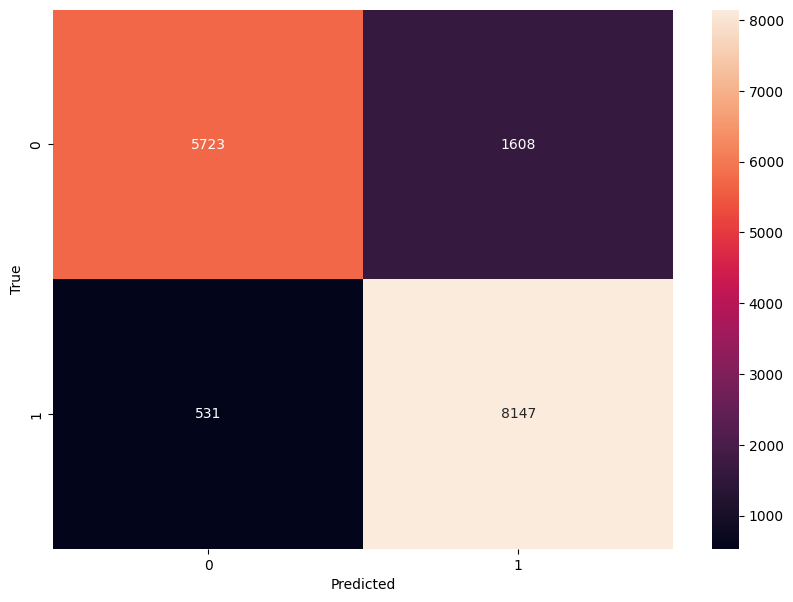

In [ ]:


cm = confusion_matrix(csv["True Label"], csv["Predicted Label"])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
# Can you compute the overall accuracy, mean accuracy and mean intersection over union?

# Overall accuracy
overall_accuracy = cm.diagonal().sum() / cm.sum()
print(f"Overall accuracy: {overall_accuracy *100}")

# Mean accuracy
mean_accuracy = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
mean_accuracy = mean_accuracy.mean()

print(f"Mean accuracy: {mean_accuracy*100}")

# Mean intersection over union
intersection = cm.diagonal()
union = cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
iou = intersection / union
miou = iou.mean()

print(f"Mean intersection over union: {miou*100}")

# F1 score
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)

# Calculate F1-score, handling cases where precision + recall = 0
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)

# Compute mean F1-score
f1 = f1.mean()

print(f"Mean F1-score: {f1*100}")

Overall accuracy: 86.63876569429696
Mean accuracy: 85.97341339107174
Mean intersection over union: 75.99896335449739
Mean F1-score: 86.32525226745547


In [ ]:
# Accuracy per class
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print(f"Accuracy per class: {accuracy_per_class}")

# Intersection over union per class
intersection = cm.diagonal()  # True positives
union = (
    cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
)  # True positives + False positives + False negatives
iou = intersection / union

print(f"Intersection over union per class: {iou}")

# F1 score per class
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)


# Make a csv with the results
results = {
    "Class" : range(0, len(accuracy_per_class)),
    "Overall Accuracy": accuracy_per_class,
    
    "IOU": iou,
    "F1-score": f1
}

results = pd.DataFrame(results)
results.to_csv("results.csv", index=False)

Accuracy per class: [0.78065748 0.93881079]
Intersection over union per class: [0.72793182 0.79204744]


In [11]:
results.to_csv("results.csv", index=False)